In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
votes = pd.read_csv('data/114_congress.csv')

In [4]:
votes['party'].value_counts()

R    54
D    44
I     2
Name: party, dtype: int64

In [11]:
distance = euclidean_distances(votes.iloc[0, 3:].values.reshape(1, -1),
                               votes.iloc[2, 3:].values.reshape(1, -1))

In [31]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2, random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
labels = kmeans_model.labels_
pd.crosstab(labels, votes.party)

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


In [33]:
democratic_outliers = votes[(labels == 1) & (votes.party == 'D')]

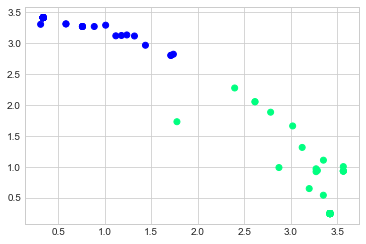

In [51]:
plt.scatter(senator_distances[:, 0], senator_distances[:, 1], c=labels, cmap='winter');

In [59]:
extremism = (senator_distances ** 3).sum(axis=1)
votes['extremism'] = extremism
votes.sort_values('extremism', ascending=False).head(10)